# Task 1
- 3 regression models

### 1) Linear Regression
- no_of_Mosquito = function(weather_features^A)

### 2) Linear Regression
- no_of_Mosquito_female = function(weather_features^B)
- OR no_of_Mosquito_male = function(weather_features^C)
- Preferably do both

### 3) Polynomial Regression
- no_of_Mosquito_female = function(weather_features^B)
- OR no_of_Mosquito_male = function(weather_features^C)
- Preferably do both

NOTE: A, B, C are a note that a subset of the inputs is used.
Use different cost functions, perform analysis of constructed models, apply normalization and standardization, feature selection

## Dataset

- You need to combine both data sets to prepare a data set suitable for model construction.
- Both data sets have different ‘time grid’ so you need to resolve it.
- You have to aggregate data points over time, and different mosquito species.

### Mosquito data notes:
From website: Capture results of mosquitoes from various locations in Edmonton. These collections are from standard New Jersey light traps that are commonly used to record changes in abundance of mosquitoes before and after control campaigns and to compare seasonal and annual fluctuations in population. Since not all mosquito species are attracted equally to light traps, the City uses a variety of other trapping and survey methods (with their own limitations) to monitor mosquitoes. Not all trap collection sites are factored into the historical averages. Some data can be incomplete due to trap failure. Some trap locations change over time. Trap collections reflect, not absolute population levels, but mosquito activity, which is influenced by changing environmental conditions (temperature, humidity, wind, etc.). The weekly averages do not include any male mosquitoes or any females of species that do not typically bite people. Each data set reflects the mosquito activity of the week previous to the collection date.

To complement this dataset, there is the Rainfall Gauge data which measures rainfall data in the Greater Edmonton area.


- Data collected from May 1990 onward
- Data is updated weekly and collected automatically

#### Columns:

- Trap Date (Date & Time Floating timestamp): date when the mosquito traps are collected. An empty mosquito traps are replaced for the next collection at the same time.
- Genus (Text): When biologists talk about a genus, they mean one or more species of animals or plants that are closely related to each other. Low-level taxonomic ranking for biological classification.
- Specific Epithet (Text): lowest taxonomic rank and having common characteristics and (usually) capable of mating with one another.
- Gender (Text): male or female
- IDd (Text or NaN): specimens too damaged for precise identification or not sigificant in the mosquito program are marked with a value of UnID.
- Count (Number/Int): number of mosquitoes trapped at this Trap Region on this Trap Date.
- Trap Region (Text): The description of where the mosquito trap was placed.
- Include (Text or NaN): blank or no.
- Comparison Group (Text): Trap areas used to evaluate mosquito program efficacy.
- Latitude (Number/Float): geographic coordinate that specifies north-south position of mosquito trap.
- Longitude (Number/Float): The geographic coordinate that specifies the east–west position of the mosquito trap.
- Location (Point): The combination of latitude/longitude for mapping purposes.

## Edmoton weather notes:
- Source: weatherstats.ca based on Environment and Climate Change Canada data

### Columns (personal notes):
- date_time_local (Date/Time human format YYYY-MM-DD HH:MM:SS TZ): date and time data recorded.
- unixtime: unix time format
- pressure_station (float or NaN):
- pressure_sea (float or NaN):
- wind_dir (Text or NaN): wind direction in compass directions (SW, WSW ... etc)
- wind_dir_10s (float or NaN): 
- wind_speed (float or NaN): speed of the wind in CONVUNIT <- TBD
- wind_gust (NaN or float): 
- relative_humidty (float or NaN):
- dew_point (float or NaN): 
- temperature (float or NaN): temp recorded
- windchill (float or NaN):
- humidex (float or NaN):
- visibility (float or NaN):
- health_index (float or NaN):
- cloud_cover_4 (float or NaN):
- cloud_cover_8 (float or NaN):
- cloud_cover_10 (float or NaN):
- solar_radiation (float or NaN):


## Imports

In [591]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white bg for sns plots
sns.set(style="whitegrid", color_codes=True)

from datetime import timedelta


import warnings
warnings.simplefilter(action='ignore')

## Read csv files

In [592]:
mos_data = pd.read_csv("./data/mosquito_data.csv")
weather_data = pd.read_csv("./data/weather_data.csv")


orig_mos_data = mos_data.copy()
orig_weather_data = weather_data.copy()

In [593]:
mos_data.head()

,trap_date,genus,specific_epithet,gender,idd,count,trap_region,include,comparison_group,latitude,longitude,geocoded_column
0,2015-09-15T00:00:00.000,Aedes,vexans,Female,NaN,3,Rural-West,NaN,Outer,53.562973,-113.787353,POINT (-113.787353 53.5629733)
1,1998-05-12T00:00:00.000,Male,UnID,Male,UnID,1,Rural-North West,NaN,Peripheral,53.617221,-113.716182,POINT (-113.716182 53.617221)
2,2001-08-28T00:00:00.000,Culex,tarsalis,Female,NaN,1,Rural-North West,NaN,Peripheral,53.617221,-113.716182,POINT (-113.716182 53.617221)
3,2004-08-17T00:00:00.000,Culex,territans,Female,NaN,1,Rural-North West,NaN,Peripheral,53.617221,-113.716182,POINT (-113.716182 53.617221)
4,2018-05-15T00:00:00.000,Culiseta,impatiens,Female,NaN,2,Rural-West,NaN,Outer,53.559020,-114.001190,POINT (-114.00119 53.559020000000004)


In [594]:
weather_data.head()

,date_time_local,unixtime,pressure_station,pressure_sea,wind_dir,wind_dir_10s,wind_speed,wind_gust,relative_humidity,dew_point,temperature,windchill,humidex,visibility,health_index,cloud_cover_4,cloud_cover_8,cloud_cover_10,solar_radiation
0,2018-12-18 16:00:00 MST,1545174000,91.73,99.7,SW,23.0,5.0,NaN,64.0,-7.3,-1.3,-3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-12-18 15:00:00 MST,1545170400,91.67,99.7,S,18.0,5.0,NaN,65.0,-6.3,-0.5,-2.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN
2,2018-12-18 14:00:00 MST,1545166800,91.67,99.6,S,17.0,5.0,NaN,51.0,-6.5,2.7,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN
3,2018-12-18 13:00:00 MST,1545163200,91.66,99.6,SE,13.0,2.0,NaN,50.0,-6.4,2.9,NaN,NaN,NaN,3.9,NaN,NaN,NaN,NaN
4,2018-12-18 12:00:00 MST,1545159600,91.75,99.7,NaN,NaN,0.0,NaN,59.0,-6.6,0.5,NaN,NaN,NaN,4.1,NaN,NaN,NaN,NaN


In [595]:
mos_data.describe()

,count,latitude,longitude
count,1000.000000,1000.000000,1000.000000
mean,33.188000,53.539761,-113.516499
std,175.409781,0.105753,0.179724
min,1.000000,53.262430,-114.001190
25%,1.000000,53.453900,-113.688650
50%,3.000000,53.562973,-113.499262
75%,10.000000,53.617221,-113.374561
max,3510.000000,53.774476,-113.221359


In [596]:
weather_data.describe()

,unixtime,pressure_station,pressure_sea,wind_dir_10s,wind_speed,wind_gust,relative_humidity,dew_point,temperature,windchill,humidex,visibility,health_index,cloud_cover_4,cloud_cover_8,cloud_cover_10,solar_radiation
count,1.752000e+04,17509.000000,17509.000000,17467.000000,17509.000000,2282.000000,17509.000000,17509.000000,17509.000000,6424.000000,840.000000,0.0,17161.000000,0.0,0.0,0.0,0.0
mean,1.513640e+09,93.539797,101.577269,21.190130,11.045519,34.594216,66.730367,-2.305232,4.313787,-13.476339,27.017857,NaN,2.760760,NaN,NaN,NaN,NaN
std,1.820784e+07,0.794158,0.923358,9.780622,6.286950,7.295547,20.052285,9.813175,12.447193,8.109714,2.033900,NaN,0.997628,NaN,NaN,NaN,NaN
min,1.482106e+09,90.650000,98.400000,0.000000,0.000000,27.000000,11.000000,-33.800000,-30.700000,-40.000000,25.000000,NaN,1.000000,NaN,NaN,NaN,NaN
25%,1.497873e+09,93.060000,101.000000,14.000000,6.000000,29.000000,52.000000,-8.400000,-4.300000,-19.000000,25.000000,NaN,2.200000,NaN,NaN,NaN,NaN
50%,1.513640e+09,93.580000,101.600000,23.000000,10.000000,33.000000,70.000000,-1.500000,4.000000,-12.000000,27.000000,NaN,2.600000,NaN,NaN,NaN,NaN
75%,1.529407e+09,94.050000,102.200000,29.000000,15.000000,38.000000,83.000000,5.400000,14.300000,-7.000000,28.000000,NaN,3.200000,NaN,NaN,NaN,NaN
max,1.545174e+09,95.960000,104.800000,36.000000,48.000000,88.000000,100.000000,18.500000,34.300000,0.000000,35.000000,NaN,11.000000,NaN,NaN,NaN,NaN


In [597]:
mos_data.dtypes

trap_date            object
genus                object
specific_epithet     object
gender               object
idd                  object
count                 int64
trap_region          object
include              object
comparison_group     object
latitude            float64
longitude           float64
geocoded_column      object
dtype: object

In [598]:
weather_data.dtypes

date_time_local       object
unixtime               int64
pressure_station     float64
pressure_sea         float64
wind_dir              object
wind_dir_10s         float64
wind_speed           float64
wind_gust            float64
relative_humidity    float64
dew_point            float64
temperature          float64
windchill            float64
humidex              float64
visibility           float64
health_index         float64
cloud_cover_4        float64
cloud_cover_8        float64
cloud_cover_10       float64
solar_radiation      float64
dtype: object

In [599]:
mos_data.isnull().sum()

trap_date             0
genus                 0
specific_epithet      0
gender                0
idd                 709
count                 0
trap_region           0
include             969
comparison_group      0
latitude              0
longitude             0
geocoded_column       0
dtype: int64

In [600]:
weather_data.isnull().sum()

date_time_local          0
unixtime                 0
pressure_station        11
pressure_sea            11
wind_dir               154
wind_dir_10s            53
wind_speed              11
wind_gust            15238
relative_humidity       11
dew_point               11
temperature             11
windchill            11096
humidex              16680
visibility           17520
health_index           359
cloud_cover_4        17520
cloud_cover_8        17520
cloud_cover_10       17520
solar_radiation      17520
dtype: int64

In [601]:
# drop visibility, cloud_cover_4, cloud_cover_8, cloud_cover_10, solar_radiation as they are all NaN, also humidex and windchill and windgust as they are mostly NaN and nothing that we can do about
weather_data.drop(columns=["visibility", "cloud_cover_4", "cloud_cover_8", "cloud_cover_10", "solar_radiation", "wind_gust", "windchill", "humidex"], inplace=True)
weather_data.head()

,date_time_local,unixtime,pressure_station,pressure_sea,wind_dir,wind_dir_10s,wind_speed,relative_humidity,dew_point,temperature,health_index
0,2018-12-18 16:00:00 MST,1545174000,91.73,99.7,SW,23.0,5.0,64.0,-7.3,-1.3,NaN
1,2018-12-18 15:00:00 MST,1545170400,91.67,99.7,S,18.0,5.0,65.0,-6.3,-0.5,4.0
2,2018-12-18 14:00:00 MST,1545166800,91.67,99.6,S,17.0,5.0,51.0,-6.5,2.7,4.0
3,2018-12-18 13:00:00 MST,1545163200,91.66,99.6,SE,13.0,2.0,50.0,-6.4,2.9,3.9
4,2018-12-18 12:00:00 MST,1545159600,91.75,99.7,NaN,NaN,0.0,59.0,-6.6,0.5,4.1


## Date and time 
We can see that both datasets are timestamped but the mosquito dataset is timestamped.
Our first task would be combining both datasets by day and month and year ignoring HH:MM:DD.
- Create a new_trap_date column in mos_data following the format YYYY-MM-DD
- Drop trap_date from mos_data
- create new_date column in weather_data following the format YYYY-MM-DD
- Drop date_time_local and unixtime in weather_data

In [602]:
mos_data["new_trap_date"] = mos_data.apply(lambda x: x["trap_date"].split("T")[0], axis=1)
mos_data.drop(columns=["trap_date", "geocoded_column"], inplace=True) #redundant

mos_data.head()

,genus,specific_epithet,gender,idd,count,trap_region,include,comparison_group,latitude,longitude,new_trap_date
0,Aedes,vexans,Female,NaN,3,Rural-West,NaN,Outer,53.562973,-113.787353,2015-09-15
1,Male,UnID,Male,UnID,1,Rural-North West,NaN,Peripheral,53.617221,-113.716182,1998-05-12
2,Culex,tarsalis,Female,NaN,1,Rural-North West,NaN,Peripheral,53.617221,-113.716182,2001-08-28
3,Culex,territans,Female,NaN,1,Rural-North West,NaN,Peripheral,53.617221,-113.716182,2004-08-17
4,Culiseta,impatiens,Female,NaN,2,Rural-West,NaN,Outer,53.559020,-114.001190,2018-05-15


In [603]:
#convert new_trap_date into datetime
format = '%Y-%m-%d'
mos_data["new_trap_date"] = pd.to_datetime(mos_data["new_trap_date"], format=format)

mos_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
genus               1000 non-null object
specific_epithet    1000 non-null object
gender              1000 non-null object
idd                 291 non-null object
count               1000 non-null int64
trap_region         1000 non-null object
include             31 non-null object
comparison_group    1000 non-null object
latitude            1000 non-null float64
longitude           1000 non-null float64
new_trap_date       1000 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 86.0+ KB


In [604]:
weather_data["new_date_time_local"] = weather_data.apply(lambda x: x["date_time_local"].split(" ")[0], axis=1)
weather_data.drop(columns=["date_time_local", "unixtime"], inplace=True)

weather_data["new_date_time_local"] = pd.to_datetime(weather_data["new_date_time_local"])

weather_data.head()

,pressure_station,pressure_sea,wind_dir,wind_dir_10s,wind_speed,relative_humidity,dew_point,temperature,health_index,new_date_time_local
0,91.73,99.7,SW,23.0,5.0,64.0,-7.3,-1.3,NaN,2018-12-18
1,91.67,99.7,S,18.0,5.0,65.0,-6.3,-0.5,4.0,2018-12-18
2,91.67,99.6,S,17.0,5.0,51.0,-6.5,2.7,4.0,2018-12-18
3,91.66,99.6,SE,13.0,2.0,50.0,-6.4,2.9,3.9,2018-12-18
4,91.75,99.7,NaN,NaN,0.0,59.0,-6.6,0.5,4.1,2018-12-18


In [605]:
count_df = weather_data.groupby(["new_date_time_local"]).size().reset_index(name='count')
count_df = count_df.loc[(count_df["count"] != 24)]

count_df

,new_date_time_local,count
0,2016-12-18,7
84,2017-03-12,23
322,2017-11-05,25
448,2018-03-11,23
686,2018-11-04,25
730,2018-12-18,17


to ensure consistency in dates the above dates will be ignored

In [606]:
# dates_to_drop = ["2016-12-18","2017-03-12","2017-11-05","2018-03-11","2018-11-04","2018-12-18"]

# weather_data = weather_data.loc[~weather_data["new_date_time_local"].isin(dates_to_drop)]

In [607]:
# # ranges of date/time columns in both dataset
# mos_date_range = str(mos_data['new_trap_date'].dt.date.min()) + ' to ' +str(mos_data['new_trap_date'].dt.date.max())
# weather_date_range = str(weather_data['new_date_time_local'].dt.date.min()) + ' to ' +str(weather_data['new_date_time_local'].dt.date.max())

# print("Range of dates in mosquito dataset is {}".format(mos_date_range))
# print("Range of dates in weather dataset is {}".format(weather_date_range))

It can be seen that the mosquito dataset is covering a much bigger range so everything before 2016-12-19 and after 2018-12-17 will be ignored.

In [608]:
# start_remove = weather_data['new_date_time_local'].dt.date.min()
# end_remove = weather_data['new_date_time_local'].dt.date.max()

# mos_data = mos_data.loc[(mos_data["new_trap_date"] > start_remove) & (mos_data["new_trap_date"] < end_remove) ]

# mos_date_range = str(mos_data['new_trap_date'].dt.date.min())+' to ' + str(mos_data['new_trap_date'].dt.date.max())
# print("Range of dates in mosquito dataset is {}".format(mos_date_range))

# mos_data.describe()

In [609]:
# mos_data = mos_data[mos_data['count'] <= mos_data.describe()['count']['75%']]

In [610]:
mos_data.isnull().sum()

genus                 0
specific_epithet      0
gender                0
idd                 709
count                 0
trap_region           0
include             969
comparison_group      0
latitude              0
longitude             0
new_trap_date         0
dtype: int64

drop idd and include columns as they are don't add enough information and mostly NaN

In [611]:
mos_data.drop(columns=["idd", "include"], inplace=True)

### Grouping weather data on date column


In [612]:
len(weather_data.index)

17520

There is now 17400 rows in the df with each timestamp having 24 different readings. We will subset the data for different uses (3 subsets for task 1 and 1 subset for task 2) here and save them as a csv file, each 6 timestamps from the 24 will be groupedby and added to a different dataframe.

In [613]:
# weather_data['wind_dir'].value_counts()

In [614]:
# #first encode wind_dir and NaN are now 0
# wind_dir_encoded = {"wind_dir": {
#     "SW": 1,
#     "WNW": 2,
#     "NW": 3,
#     "W": 4,
#     "WSW": 5,
#     "SSW": 6,
#     "NNW": 7,
#     "S": 8,
#     "N": 9,
#     "SSE": 10,
#     "SE": 11,
#     "ENE": 12,
#     "E": 13,
#     "NNE": 14,
#     "ESE": 15,
#     "NE": 16,
# }}

# weather_data["wind_dir"] = weather_data["wind_dir"].fillna(0)
# weather_data = weather_data.replace(wind_dir_encoded)

# weather_data['wind_dir'].value_counts()

Now that we have 4 subsets we need to group them by the date.
Before grouping them we need to decide how are we planning to group the values with minimal distribution loss.

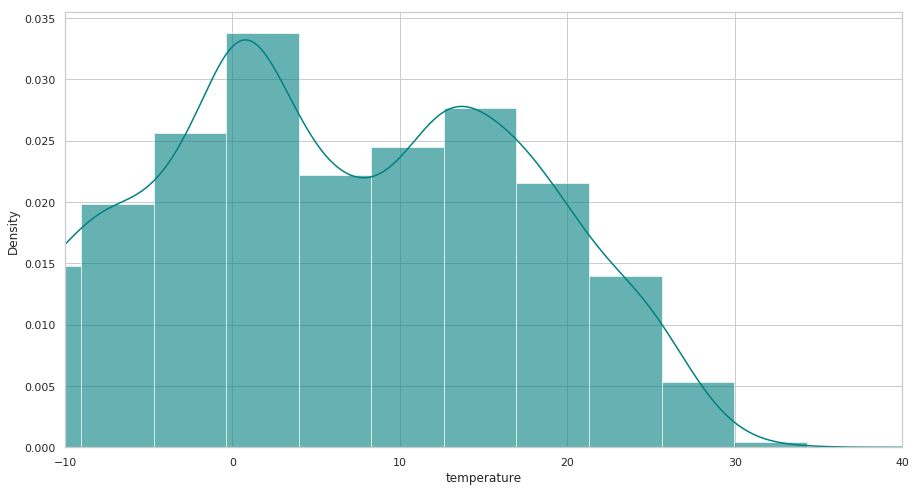

In [615]:
#current distribution:
plt.figure(figsize=(15, 8))
ax = weather_data["temperature"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
weather_data["temperature"].plot(kind='density', color='teal')


ax.set(xlabel="temperature")
plt.xlim(-10,40)
plt.show()

In [616]:
weather_data_mean = weather_data.groupby("new_date_time_local", as_index=False).agg({
    "wind_dir":lambda x: x.value_counts().index[0],
    "wind_dir_10s":lambda x: x.value_counts().index[0],
    "wind_speed":lambda x: round(x.mean(),1),#x.median(),#x.mode().iloc[0],
    "relative_humidity":lambda x: round(x.mean(),1),
    "dew_point":lambda x: round(x.mean(),1),
    "temperature":lambda x: round(x.mean(),1),
})

weather_data_mode = weather_data.groupby("new_date_time_local", as_index=False).agg({
    "wind_dir":lambda x: x.value_counts().index[0],
    "wind_dir_10s":lambda x: x.value_counts().index[0],
    "wind_speed":lambda x: x.mode().iloc[0],
    "relative_humidity":lambda x: x.mode().iloc[0],
    "dew_point":lambda x: x.mode().iloc[0],
    "temperature":lambda x: x.mode().iloc[0],
})

weather_data_median = weather_data.groupby("new_date_time_local", as_index=False).agg({
    "wind_dir":lambda x: x.value_counts().index[0],
    "wind_dir_10s":lambda x: x.value_counts().index[0],
    "wind_speed":lambda x: x.median(),
    "relative_humidity":lambda x: x.median(),
    "dew_point":lambda x: x.median(),
    "temperature":lambda x: x.median(),
})



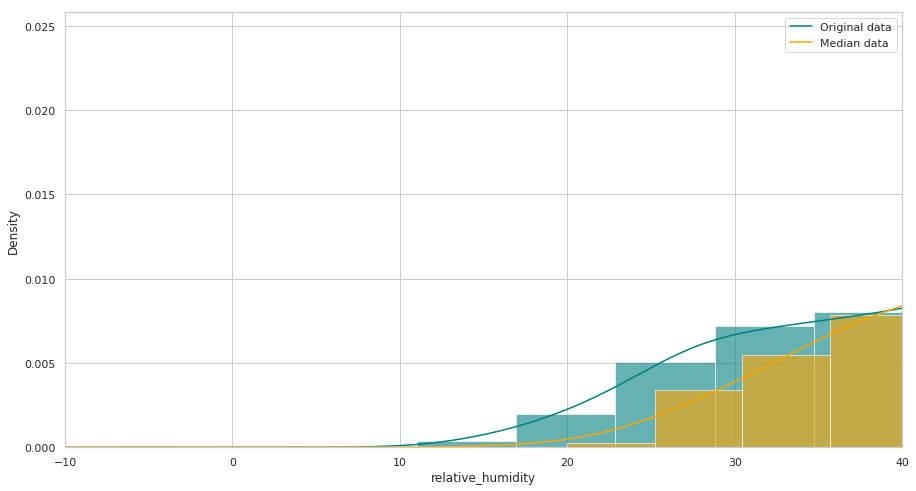

In [617]:

key_to_test = 'relative_humidity'

plt.figure(figsize=(15, 8))
ax = weather_data[key_to_test].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
weather_data[key_to_test].plot(kind='density', color='teal')


ax = weather_data_median[key_to_test].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.6)
weather_data_median[key_to_test].plot(kind='density', color='orange')


ax.legend(['Original data', 'Median data'])
ax.set(xlabel=key_to_test)
plt.xlim(-10,40)
plt.show()

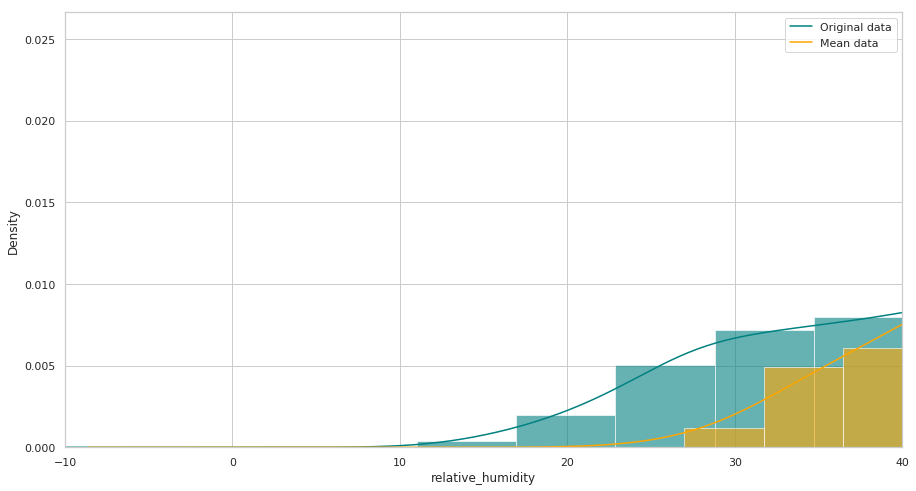

In [618]:
plt.figure(figsize=(15, 8))
ax = weather_data[key_to_test].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
weather_data[key_to_test].plot(kind='density', color='teal')

ax = weather_data_mean[key_to_test].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.6)
weather_data_mean[key_to_test].plot(kind='density', color='orange')

ax.legend(['Original data', 'Mean data'])
ax.set(xlabel=key_to_test)
plt.xlim(-10,40)
plt.show()


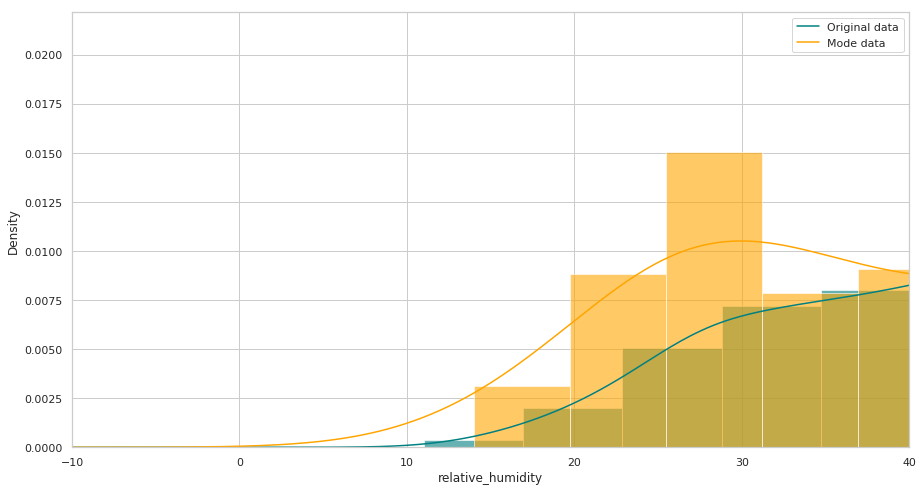

In [619]:
plt.figure(figsize=(15, 8))
ax = weather_data[key_to_test].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
weather_data[key_to_test].plot(kind='density', color='teal')


ax = weather_data_mode[key_to_test].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.6)
weather_data_mode[key_to_test].plot(kind='density', color='orange')

ax.legend(['Original data', 'Mode data'])
ax.set(xlabel=key_to_test)
plt.xlim(-10,40)
plt.show()


It can be seen that the mean data follows the distribution the most so it will be used.

In [620]:
weather_data_final = weather_data.groupby("new_date_time_local", as_index=False).agg({
    "wind_dir":lambda x: x.value_counts().index[0],
    "wind_dir_10s":lambda x: x.value_counts().index[0],
    "wind_speed":lambda x: round(x.mean(),1),#x.median(),#x.mode().iloc[0],
    "relative_humidity":lambda x: x.median(),
    "dew_point":lambda x: x.median(),
    "temperature":lambda x: x.median(),
})



Now all NaNs are replaced

In [621]:
weather_data_final.isnull().sum()

new_date_time_local    0
wind_dir               0
wind_dir_10s           0
wind_speed             0
relative_humidity      0
dew_point              0
temperature            0
dtype: int64

In [622]:
mos_data.sort_values(by='new_trap_date', inplace=True)

## Combine both datasets

In [623]:
mos_data.head()

,genus,specific_epithet,gender,count,trap_region,comparison_group,latitude,longitude,new_trap_date
721,Culiseta,alaskaensis,Female,1,Rural-South West,Peripheral,53.453900,-113.68865,1990-05-22
660,Ochlerotatus,Black legs,Female,2,Rural-South West,Peripheral,53.453900,-113.68865,1990-05-29
939,Aedes,dorsalis,Female,2,Rural-South East,Peripheral,53.395831,-113.39354,1990-06-12
224,Ochlerotatus,fitchii,Female,12,Rural-South East,Peripheral,53.395831,-113.39354,1990-06-19
912,Culiseta,alaskaensis,Female,2,Rural-South West,Peripheral,53.453900,-113.68865,1990-06-19


In [624]:
mos_data.tail()

,genus,specific_epithet,gender,count,trap_region,comparison_group,latitude,longitude,new_trap_date
84,Culex,pipiens/restuans,Female,1,Residential-South,Core,53.482057,-113.418346,2020-08-11
535,Anopheles,earlei,Female,1,Residential-South,Core,53.482057,-113.418346,2020-08-25
226,Male,UnID,Male,36,Residential-North,Core,53.579459,-113.499262,2020-09-08
680,Culiseta,minnesotae,Female,6,Residential-South,Core,53.482057,-113.418346,2020-09-22
877,Male,UnID,Male,42,Residential-North,Core,53.579459,-113.499262,2020-09-22


In [625]:
len(mos_data.index)

1000

It can be seen that at one day there might be multiple rows due to different trap location thus different records. In order to combine both dataframes we need to:


**ASSUMPTION 1**: the weather is the same for all locations for the whole week.

We need to group the weather data weekly.

In [626]:
# start_remove = mos_data["new_trap_date"].dt.date.min()
# end_remove = mos_data["new_trap_date"].dt.date.max() + timedelta(days=2) #final week isn't complete so instead of losing a whole week in the data we are going to add 2 days from the weather data

# print(start_remove, end_remove, sep=' ')

# weather_data_final = weather_data_final.loc[(weather_data_final["new_date_time_local"] >= start_remove) & (weather_data_final["new_date_time_local"] <= end_remove) ]

weather_data_final.sort_values(by='new_date_time_local', inplace=True)


weather_data_final.tail()


,new_date_time_local,wind_dir,wind_dir_10s,wind_speed,relative_humidity,dew_point,temperature
726,2018-12-14,S,19.0,13.2,64.0,-5.00,2.60
727,2018-12-15,NW,31.0,17.5,55.0,-8.75,0.50
728,2018-12-16,ESE,12.0,11.3,73.0,-12.00,-7.35
729,2018-12-17,SW,23.0,6.5,83.0,-9.90,-6.80
730,2018-12-18,SW,26.0,4.4,73.0,-7.60,-4.00


In [627]:
len(weather_data_final.index)

731

In [628]:
len(mos_data.index)

1000

We need to group the data by every 7 days and again taking the weekly mean. The mean here is chosen as in general its the average of the 7 days calculated we are not using the mode as the values aren't generally repeated and not the median as we need to account that during the whole week certain events happened.

In [629]:
mos_data.tail(7)

,genus,specific_epithet,gender,count,trap_region,comparison_group,latitude,longitude,new_trap_date
985,Ochlerotatus,mercurator,Female,2,River Valley-East,Core,53.581417,-113.374561,2020-08-04
189,Aedes,vexans,Female,215,River Valley-West,Core,53.504068,-113.570126,2020-08-04
84,Culex,pipiens/restuans,Female,1,Residential-South,Core,53.482057,-113.418346,2020-08-11
535,Anopheles,earlei,Female,1,Residential-South,Core,53.482057,-113.418346,2020-08-25
226,Male,UnID,Male,36,Residential-North,Core,53.579459,-113.499262,2020-09-08
680,Culiseta,minnesotae,Female,6,Residential-South,Core,53.482057,-113.418346,2020-09-22
877,Male,UnID,Male,42,Residential-North,Core,53.579459,-113.499262,2020-09-22


In [630]:
# weather_data_final = weather_data_final.groupby('new_date_time_local').agg({
#     "new_date_time_local": 'first',
#     "wind_dir":lambda x: x.value_counts().index[0],
#     "wind_dir_10s":lambda x: x.value_counts().index[0],
#     "wind_speed":lambda x: round(x.mean(),1),#x.mode().iloc[0],
#     "relative_humidity":lambda x: x.median(),
#     "dew_point":lambda x: x.median(),
#     "temperature":lambda x: x.median(),
# })



weather_data_final.reset_index(drop=True, inplace=True)

weather_data_final.sort_values(by='new_date_time_local', inplace=True)


In [631]:
weather_data_final.tail()

,new_date_time_local,wind_dir,wind_dir_10s,wind_speed,relative_humidity,dew_point,temperature
726,2018-12-14,S,19.0,13.2,64.0,-5.00,2.60
727,2018-12-15,NW,31.0,17.5,55.0,-8.75,0.50
728,2018-12-16,ESE,12.0,11.3,73.0,-12.00,-7.35
729,2018-12-17,SW,23.0,6.5,83.0,-9.90,-6.80
730,2018-12-18,SW,26.0,4.4,73.0,-7.60,-4.00


In [632]:
weather_data_final.at[71,'new_date_time_local'] = mos_data["new_trap_date"].dt.date.max()

weather_data_final.tail()
# len(weather_data_A_final.index)

,new_date_time_local,wind_dir,wind_dir_10s,wind_speed,relative_humidity,dew_point,temperature
726,2018-12-14,S,19.0,13.2,64.0,-5.00,2.60
727,2018-12-15,NW,31.0,17.5,55.0,-8.75,0.50
728,2018-12-16,ESE,12.0,11.3,73.0,-12.00,-7.35
729,2018-12-17,SW,23.0,6.5,83.0,-9.90,-6.80
730,2018-12-18,SW,26.0,4.4,73.0,-7.60,-4.00


Before finalizing the data 

Now that we finished everything regarding the weather data we focus on grouping the mos_data

In [633]:
mos_data.reset_index(drop=True, inplace=True)

In [634]:
mos_data = mos_data.groupby(["new_trap_date"], as_index=False).agg({
    "count":"sum",
    
})

In [635]:
len(mos_data.index)

418

In [636]:
final = pd.merge(left=mos_data, right=weather_data_final, left_on="new_trap_date", right_on="new_date_time_local")



#D is used in task 2

final.head()

,new_trap_date,count,new_date_time_local,wind_dir,wind_dir_10s,wind_speed,relative_humidity,dew_point,temperature
0,2017-05-09,1,2017-05-09,NW,32.0,6.8,41.0,0.50,13.50
1,2017-05-16,1,2017-05-16,ENE,6.0,14.1,73.0,2.65,8.30
2,2017-05-23,24,2017-05-23,SSW,20.0,12.1,36.0,5.10,21.45
3,2017-05-30,36,2017-05-30,SSE,15.0,22.4,33.5,3.05,20.05
4,2017-06-06,3,2017-06-06,SSE,15.0,11.5,35.0,4.30,20.55


Notes to self:
- now that everything is done, am I actually doing everything right ? Is averaging everything is actually the best way to do it ?
- stopped at: both data are successfully merged, next is visuallizing the data following the titanic approach and finally building the models.

In [637]:
len(final.index)

38

In [638]:
# print("Gender of mosquitos trapped records:")
# print(final_A['gender'].value_counts())
# sns.countplot(x='gender', data=final_A, palette='Set2')
# plt.show()
# print("The most common gender records is %s" % final_A['gender'].value_counts().idxmax())

In [639]:
#drop dates columns as they are irrelevant now
final.drop(columns=["new_trap_date", "new_date_time_local"], inplace=True)

In [640]:
# final["genus"] = final["genus"].astype('category')
# final["specific_epithet"] = final["specific_epithet"].astype('category')
# final["gender"] = final["gender"].astype('category')
# final["trap_region"] = final["trap_region"].astype('category')
# final["comparison_group"] = final["comparison_group"].astype('category')
final["wind_dir"] = final["wind_dir"].astype('category')


# final["genus_cat"] = final["genus"].cat.codes
# final["specific_epithet_cat"] = final["specific_epithet"].cat.codes
# final["gender_cat"] = final["gender"].cat.codes
# final["trap_region_cat"] = final["trap_region"].cat.codes
# final["comparison_group_cat"] = final["comparison_group"].cat.codes
final["wind_dir_cat"] = final["wind_dir"].cat.codes

# dummies = pd.get_dummies(final[["genus", "gender", "trap_region", "comparison_group", "wind_dir"]])

# final = pd.concat([final, dummies], axis=1)

final.head()

,count,wind_dir,wind_dir_10s,wind_speed,relative_humidity,dew_point,temperature,wind_dir_cat
0,1,NW,32.0,6.8,41.0,0.50,13.50,5
1,1,ENE,6.0,14.1,73.0,2.65,8.30,0
2,24,SSW,20.0,12.1,36.0,5.10,21.45,8
3,36,SSE,15.0,22.4,33.5,3.05,20.05,7
4,3,SSE,15.0,11.5,35.0,4.30,20.55,7


In [641]:
cols = ["genus", "specific_epithet", "gender", "trap_region", "comparison_group", "wind_dir"]

final.drop(columns=["wind_dir"], inplace=True)

In [642]:
final.head()

,count,wind_dir_10s,wind_speed,relative_humidity,dew_point,temperature,wind_dir_cat
0,1,32.0,6.8,41.0,0.50,13.50,5
1,1,6.0,14.1,73.0,2.65,8.30,0
2,24,20.0,12.1,36.0,5.10,21.45,8
3,36,15.0,22.4,33.5,3.05,20.05,7
4,3,15.0,11.5,35.0,4.30,20.55,7


## Part A: Linear regression num of Mosquitos

In [643]:
# sns.pairplot(final_A)

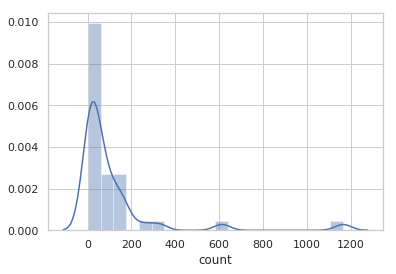

In [644]:
sns.distplot(final["count"])

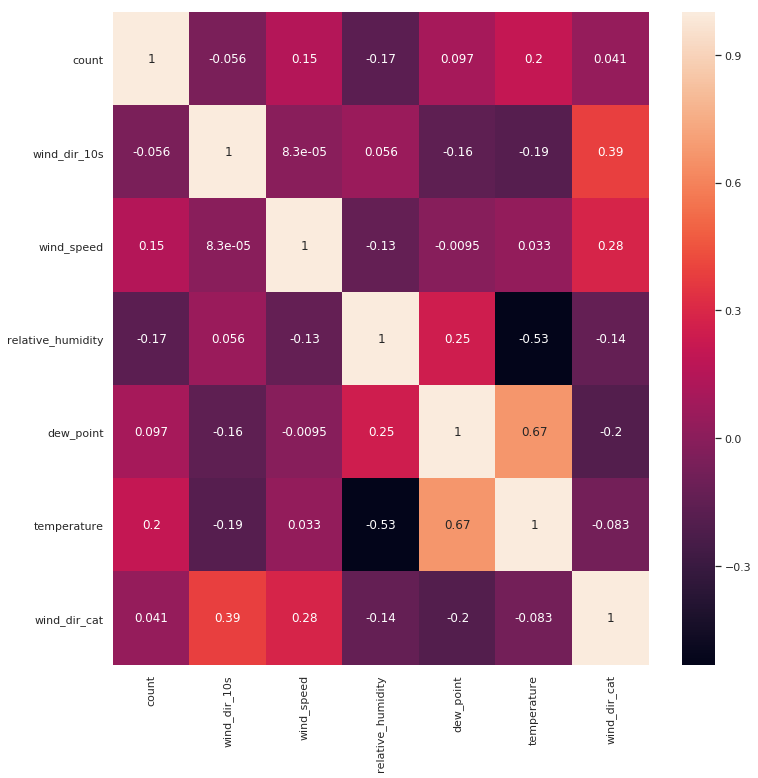

In [645]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(final.corr(), annot=True, ax=ax)

In [646]:
final.head()

,count,wind_dir_10s,wind_speed,relative_humidity,dew_point,temperature,wind_dir_cat
0,1,32.0,6.8,41.0,0.50,13.50,5
1,1,6.0,14.1,73.0,2.65,8.30,0
2,24,20.0,12.1,36.0,5.10,21.45,8
3,36,15.0,22.4,33.5,3.05,20.05,7
4,3,15.0,11.5,35.0,4.30,20.55,7


In [647]:
# final_A.groupby('trap_region_cat').mean()["count"].plot(kind='bar')

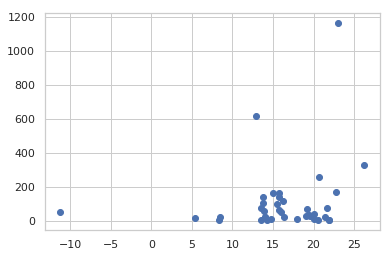

In [648]:
plt.scatter(final["temperature"], final["count"])
plt.show()

In [649]:
# final_A.groupby('comparison_group_cat').mean()["count"].plot(kind='bar')

In [650]:
# final_A.groupby('specific_epithet_cat').mean()["count"].plot(kind='bar')

In [651]:
# final_A.groupby('genus_cat').mean()["count"].plot(kind='bar')

In [652]:
from sklearn.preprocessing import StandardScaler

cols = [ 'latitude', 'longitude', 'genus_cat','trap_region_cat','comparison_group_cat','wind_dir_cat','count','wind_dir_10s']

X = final.drop(columns=['count','wind_dir_10s'])

y = final['count']

# cols= ['wind_speed', 'relative_humidity', 'dew_point', 'temperature']
# X[cols] = X[cols].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
# X[cols] = StandardScaler().fit_transform(X[cols])


In [653]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [654]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [655]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [656]:
print(lin_reg.intercept_)
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

531.3050761536381


,Coefficient
wind_speed,11.348109
relative_humidity,-6.257913
dew_point,23.165776
temperature,-18.738108
wind_dir_cat,-7.284451


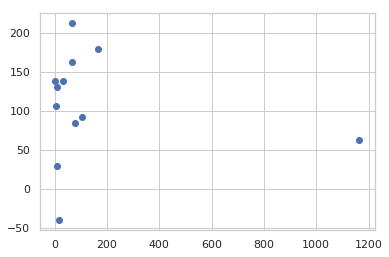

In [657]:
pred = lin_reg.predict(X_test)
plt.scatter(y_test, pred)

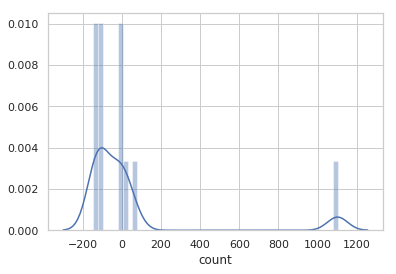

In [658]:
sns.distplot((y_test - pred), bins=50);

In [659]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 160.6139497490577
MSE: 108751.4144092342
RMSE: 329.77479347159664
R2 Square -0.11754354812391266
Train set evaluation:
_____________________________________
MAE: 83.23001742033975
MSE: 12499.381860180034
RMSE: 111.80063443549878
R2 Square 0.2757698015629657


In [660]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,160.61395,108751.414409,329.774793,-0.117544,-50.587819
